# Deep Learning Convulitional Neural Network with PyTorch

In [1]:
!pip install torch==1.9.0+cpu torchvision==0.10.0+cpu torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F

import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print('Libraries imported - ready to use PyTorch', torch.__version__)

Libraries imported - ready to use PyTorch 1.9.0+cpu


### Data Understanding

In [20]:
data_path = 'data/shapes/'

classes = os.listdir(data_path)
classes.sort()
print(len(classes), 'classes:')
print(classes)

fig = plt.figure(figsize=(8, 12))
i = 0
for sub_dir in os.listdir(data_path):
    i+=1
    img_file = os.listdir(os.path.join(data_path, sub_dir))[0]
    img_path = os.path.join(data_pa th , sub_dir, img_file)
    img = mpimg.imread(img_path)
    a=fig.add_subplot(1, len(classes), i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file)
plt.show()

SyntaxError: invalid syntax (515868722.py, line 13)

### Data Load

In [9]:
def load_dataset(data_path):
    transformation = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

   
    full_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transformation
    )
    
    
    
    train_size = int(0.7 * len(full_dataset))
    test_size = len(full_dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
    
   
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=50,
        num_workers=0,
        shuffle=False
    )
    
  
    test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=50,
        num_workers=0,
        shuffle=False
    )
        
    return train_loader, test_loader


train_loader, test_loader = load_dataset(data_path)
print('Data loaders ready')

Data loaders ready


### Data define the CNN

In [11]:
class Net(nn.Module):
    def __init__(self, num_classes=3):
        super(Net, self).__init__()
    
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, stride=1, padding=1)
        
        self.drop = nn.Dropout2d(p=0.2)
        
        self.fc = nn.Linear(in_features=32 * 32 * 24, out_features=num_classes)
    
    def forward(self, x):
        x = F.relu(self.pool(self.conv1(x)))
        x = F.relu(self.pool(self.conv2(x)))
        x = F.relu(self.drop(self.conv3(x)))
        x = F.dropout(x, training=self.training)
        
        # Flatten
        x = x.view(-1, 32 * 32 * 24)
        x = self.fc(x)
        return F.log_softmax(x, dim=1)
print('CNN model class defined!')

CNN model class defined!


### Data Training Model

In [15]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0
    print('Epoch:', epoch)
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_criteria(output, target)
        train_loss += loss.item()
        
        # Propagasi Mundur
        loss.backward()
        optimizer.step()
        
        if batch_idx % 10 == 0:
            print('Training set[{}/{} ({:.0f}%)] Loss: {:.6f}'.format(
                batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    avg_loss = train_loss / (batch_idx+1)
    print('Training set: Average Loss: {:.6f}'.format(avg_loss))
    return avg_loss

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        batch_count = 0
        for data, target in test_loader:
            batch_count += 1
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_criteria(output, target).item()
            _, predicted = torch.max(output.data, 1)
            correct += torch.sum(target==predicted).item()
            
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return avg_loss

device = 'cpu'
if (torch.cuda.is_available()):
    device = 'cuda'
print('Training on', device)

model = Net(num_classes=len(classes)).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_criteria = nn.CrossEntropyLoss()

epoch_nums = []
training_loss = []
validation_loss = []

epochs = 5
for epoch in range(1, epochs + 1):
    train_loss = train(model, device, train_loader, optimizer, epoch)
    test_loss = test(model, device, test_loader)
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

Training on cpu
Epoch: 1
Training set[0/840 (0%)] Loss: 1.101714
Training set[500/840 (59%)] Loss: 0.916033
Training set: Average Loss: 0.895633
Validation set: Average loss: 0.545182, Accuracy: 266/360 (74%)

Epoch: 2
Training set[0/840 (0%)] Loss: 0.501083
Training set[500/840 (59%)] Loss: 0.392100
Training set: Average Loss: 0.386258
Validation set: Average loss: 0.567915, Accuracy: 271/360 (75%)

Epoch: 3
Training set[0/840 (0%)] Loss: 0.570567
Training set[500/840 (59%)] Loss: 0.338905
Training set: Average Loss: 0.306894
Validation set: Average loss: 0.195836, Accuracy: 341/360 (95%)

Epoch: 4
Training set[0/840 (0%)] Loss: 0.181246
Training set[500/840 (59%)] Loss: 0.191311
Training set: Average Loss: 0.165609
Validation set: Average loss: 0.106677, Accuracy: 356/360 (99%)

Epoch: 5
Training set[0/840 (0%)] Loss: 0.109844
Training set[500/840 (59%)] Loss: 0.110603
Training set: Average Loss: 0.098771
Validation set: Average loss: 0.051843, Accuracy: 357/360 (99%)



### Review Loss History

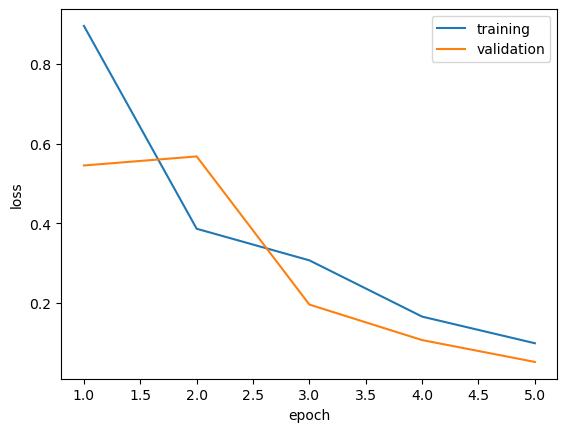

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

### Evaluate Model Performance

Getting predictions from test set...


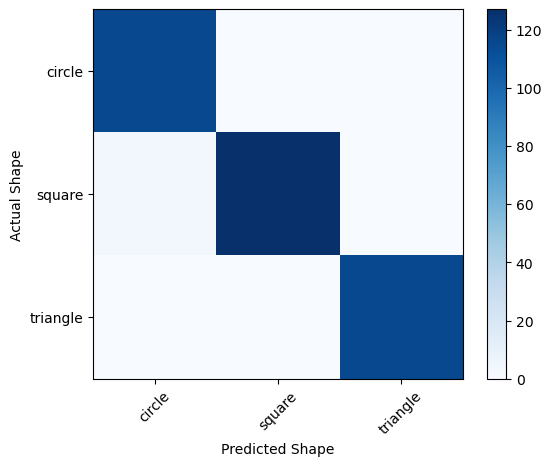

In [17]:
from sklearn.metrics import confusion_matrix

model.eval()

print('Getting predictions from test set...')
truelabels = []
predictions = []
for data, target in test_loader:
    for label in target.cpu().data.numpy():
        truelabels.append(label)
    for prediction in model.cpu()(data).data.numpy().argmax(1):
        predictions.append(prediction)
        
cm = confusion_matrix(truelabels, predictions)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Shape')
plt.ylabel('Actual Shape')
plt.show()

### Save Test Model

In [18]:
model_file = 'models/shape_classifier.pt'
torch.save(model.state_dict(), model_file)
del model
print('Model saved as', model_file)

Model saved as models/shape_classifier.pt


triangle


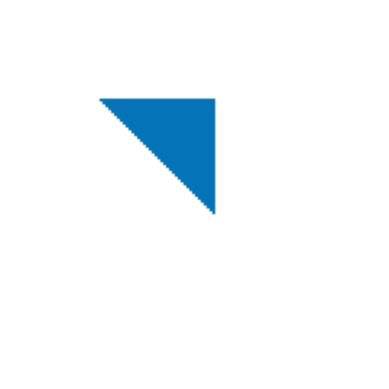

In [19]:
import matplotlib.pyplot as plt
import os
from random import randint
%matplotlib inline


def predict_image(classifier, image):
    import numpy
    
    classifier.eval()
    
    transformation = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    image_tensor = transformation(image).float()

    image_tensor = image_tensor.unsqueeze_(0)

    input_features = Variable(image_tensor)

    output = classifier(input_features)
    index = output.data.numpy().argmax()
    return index

def create_image (size, shape):
    from random import randint
    import numpy as np
    from PIL import Image, ImageDraw
    
    xy1 = randint(10,40)
    xy2 = randint(60,100)
    col = (randint(0,200), randint(0,200), randint(0,200))

    img = Image.new("RGB", size, (255, 255, 255))
    draw = ImageDraw.Draw(img)
    
    if shape == 'circle':
        draw.ellipse([(xy1,xy1), (xy2,xy2)], fill=col)
    elif shape == 'triangle':
        draw.polygon([(xy1,xy1), (xy2,xy2), (xy2,xy1)], fill=col)
    else: 
        draw.rectangle([(xy1,xy1), (xy2,xy2)], fill=col)
    del draw
    
    return np.array(img)

classnames = os.listdir(os.path.join('data', 'shapes'))
classnames.sort()
shape = classnames[randint(0, len(classnames)-1)]
img = create_image ((128,128), shape)

plt.axis('off')
plt.imshow(img)

model = Net()
model.load_state_dict(torch.load(model_file))


index = predict_image(model, img)
print(classes[index])